<div style="text-align: center;">

# MA 203: Numerical Methods
## Tutorial-2

Shardul Junagade <br>
23110297

</div>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

## **Question 1:**

Suppose that a spherical droplet of a liquid evaporates at a rate that is proportional to its surface area.

$$\frac{dV}{dt} = -kA$$

where $ V = $ volume (mm $^3$), $ t = $ time (min), $ k = $ the evaporation rate (mm/min), and $ A = $ surface area (mm $^2$). Use Euler's method to compute the volume of the droplet from $ t = 0 $ to $ 10 $ min using a step size of $ 0.25 $ min. Assume that $ k = 0.1 $ mm/min and that the droplet initially has a radius of $ 3 $ mm. Assess the validity of your results by determining the radius of your final computed volume. Calculate the average evaporation rate (change in radius/time) and verify that it is consistent with the given evaporation rate.

### **Solution:**

We will use Euler's method to approximate the volume of a spherical droplet as it evaporates over time. The evaporation rate is proportional to the surface area of the droplet. The differential equation governing this process is:

$$\frac{dV}{dt} = -kA$$

Constants and Initial Conditions:
- $ k = 0.1 $ mm/min (evaporation rate)
- $ r_{\text{initial}} = 3 $ mm (initial radius)
- $ t_{\text{start}} = 0 $ min (start time)
- $ t_{\text{end}} = 10 $ min (end time)
- $ \Delta t = 0.25 $ min (time step)

The initial volume $ V $ is calculated using the formula for the volume of a sphere:

$$ V = \frac{4}{3} \pi r_{\text{initial}}^3 $$

#### Euler's Method
Euler's method is used to iteratively compute the volume and radius of the droplet at each time step. The surface area $ A $ of the droplet is given by:

$$ A = 4 \pi r^2 $$

The rate of change in volume $ \frac{dV}{dt} $ is then calculated using the evaporation rate $ k $ and the surface area $ A $:

$$ \frac{dV}{dt} = -kA $$

The new volume $ V $ is then updated as:

$$ V_{i+1} = V_i + \Delta t \cdot \left(\frac{dV}{dt}\right)_i $$

$$ V_{i+1} = V_i - k \cdot 4 \pi r_i^2 \cdot \Delta t $$

The new radius $ r $ is computed from the updated volume:

$$ r_{i+1} = \left( \frac{3V_{i+1}}{4\pi} \right)^{1/3} $$


#### Average rate of evaporation
The average rate of evaporation can be calculated by dividing the radius change by the time change:
$$
\text{Average rate of evaporation} = \frac{r_{\text{final}} - r_{\text{initial}}}{t_{\text{end}} - t_{\text{start}}}
$$



Time: 0.25 min, Volume: 110.2699 mm³, Radius: 2.9748 mm
Time: 0.50 min, Volume: 107.4898 mm³, Radius: 2.9496 mm
Time: 0.75 min, Volume: 104.7566 mm³, Radius: 2.9244 mm
Time: 1.00 min, Volume: 102.0700 mm³, Radius: 2.8991 mm
Time: 1.25 min, Volume: 99.4294 mm³, Radius: 2.8739 mm
Time: 1.50 min, Volume: 96.8347 mm³, Radius: 2.8487 mm
Time: 1.75 min, Volume: 94.2852 mm³, Radius: 2.8235 mm
Time: 2.00 min, Volume: 91.7807 mm³, Radius: 2.7983 mm
Time: 2.25 min, Volume: 89.3208 mm³, Radius: 2.7730 mm
Time: 2.50 min, Volume: 86.9050 mm³, Radius: 2.7478 mm
Time: 2.75 min, Volume: 84.5330 mm³, Radius: 2.7226 mm
Time: 3.00 min, Volume: 82.2043 mm³, Radius: 2.6973 mm
Time: 3.25 min, Volume: 79.9186 mm³, Radius: 2.6721 mm
Time: 3.50 min, Volume: 77.6754 mm³, Radius: 2.6469 mm
Time: 3.75 min, Volume: 75.4745 mm³, Radius: 2.6216 mm
Time: 4.00 min, Volume: 73.3153 mm³, Radius: 2.5964 mm
Time: 4.25 min, Volume: 71.1975 mm³, Radius: 2.5711 mm
Time: 4.50 min, Volume: 69.1206 mm³, Radius: 2.5459 mm
Time: 

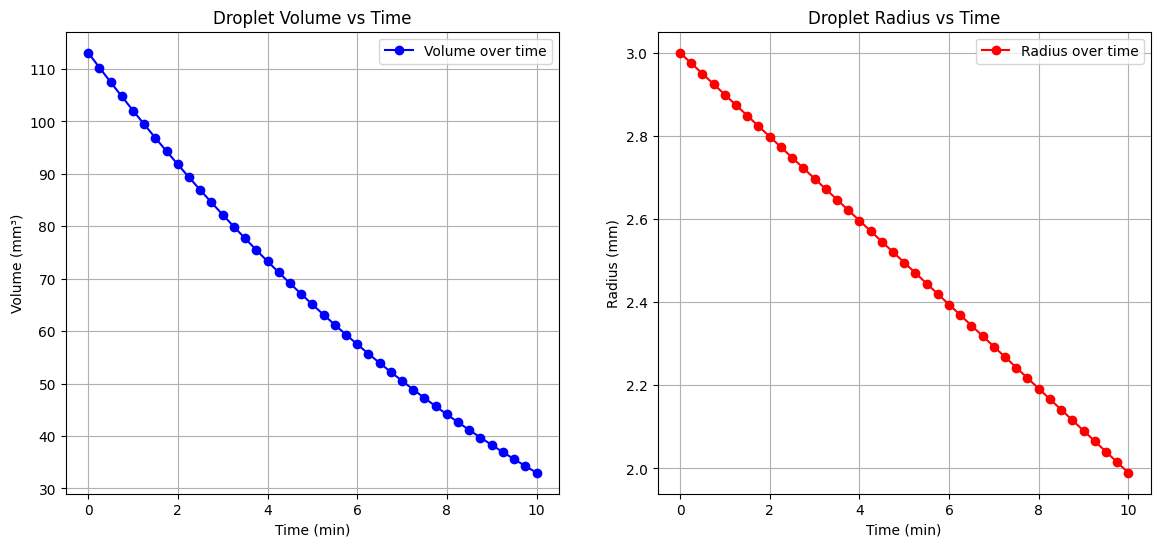

In [9]:
# Constants
k = 0.1               # Evaporation rate (mm/min)
r_initial = 3         # Initial radius (mm)
t_start = 0           # Start time (min)
t_end = 10            # End time (min)
dt = 0.25             # Time step (min)
# Initial Conditions
V = (4/3) * np.pi * r_initial**3
r = r_initial

V_list = [V]
t_list = [t_start]
r_list = [r_initial]

# Euler's Method
t = t_start
while t < t_end:
	A = 4 * np.pi * r**2
	dV = -k * A
	V += dV * dt
	r = (3 * V / (4 * np.pi))**(1/3)
	t += dt

	print(f"Time: {t:.2f} min, Volume: {V:.4f} mm³, Radius: {r:.4f} mm")    
	V_list.append(V)
	r_list.append(r)
	t_list.append(t)


# Final Results
final_volume = V_list[-1]
final_radius = r_list[-1]
print(f"\nFinal volume: {final_volume:.4f} mm³")
print(f"Final radius: {final_radius:.4f} mm")

# Calculate Average Evaporation Rate (Change in radius/time)
avg_rate = (r_initial - final_radius) / (t_end - t_start)
print(f"Average evaporation rate: {avg_rate:.4f} mm/min")
print(f"Given evaporation rate: {k:.4f} mm/min")

# Plot Results
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))
# Plot Volume vs Time
ax1[0].plot(t_list, V_list, label='Volume over time', color='blue', marker='o')
ax1[0].set_xlabel('Time (min)')
ax1[0].set_ylabel('Volume (mm³)')
ax1[0].set_title('Droplet Volume vs Time')
ax1[0].legend()
ax1[0].grid(True)
# Plot Radius vs Time
ax1[1].plot(t_list, r_list, label='Radius over time', color='red', marker='o')
ax1[1].set_xlabel('Time (min)')
ax1[1].set_ylabel('Radius (mm)')
ax1[1].set_title('Droplet Radius vs Time')
ax1[1].legend()
ax1[1].grid(True)
plt.show()

#### **Results:**

- The final volume of the droplet is $ \textbf{32.9961} $ **mm³**, the final radius is $ \textbf{1.9897} $ **mm**. 
- The average evaporation rate is $ \textbf{0.1010} $ **mm/min**, which is consistent with the given evaporation rate of $ \textbf{0.1000} $ **mm/min**.

## **Question 2:**

Use zero-through third-order Taylor series expansions to predict $ f(3) $ for  
$$ f(x) = 25x^3 - 6x^2 + 7x - 88 $$
Using a base point at $ x = 1 $. Compute the true percent relative error $ \epsilon_t $ for each approximation.

### **Solution:**

The Taylor series expansion of a function $ f(x) $ about a base point $ x = a $ is given by
$$ f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \cdots $$
where $ f'(x) $, $ f''(x) $, and $ f'''(x) $ are the first, second, and third derivatives of $ f(x) $, respectively.

Given $ f(x) = 25x^3 - 6x^2 + 7x - 88 $, we can compute the first, second, and third derivatives as follows:
1. First derivative:
$$ f'(x) = 75x^2 - 12x + 7 $$
2. Second derivative:
$$ f''(x) = 150x - 12 $$
3. Third derivative:
$$ f'''(x) = 150 $$

Using the base point $ x = 1 $, we can compute the function and its derivatives at $ x = 1 $:
- $ f(1) = 25(1)^3 - 6(1)^2 + 7(1) - 88 = 25 - 6 + 7 - 88 = -62 $
- $ f'(1) = 75(1)^2 - 12(1) + 7 = 75 - 12 + 7 = 70 $
- $ f''(1) = 150(1) - 12 = 150 - 12 = 138 $
- $ f'''(1) = 150 $


#### **Zero-through third-order approximations:**

Now, we can use the Taylor series expansions to predict $ f(3) $ for zero-through third-order approximations:
$$\begin{aligned}
    \text{Zero-order approximation:} \quad f(3) &\approx f(1) = -62 \\

    \text{First-order approximation:} \quad f(3) &\approx f(1) + f'(1)(3 - 1) \\ 
    &= -62 + 70 \cdot 2 = -62 + 140 \\ 
    &= 78 \\

    \text{Second-order approximation:} \quad f(3) &\approx f(1) + f'(1)(3 - 1) + \frac{f''(1)}{2!}(3 - 1)^2 \\
    &= -62 + 70 \cdot 2 + \frac{138}{2} \cdot 4\\
    &= -62 + 140 + 276\\
    &= 354 \\

    \text{Third-order approximation:} \quad f(3) &\approx f(1) + f'(1)(3 - 1) + \frac{f''(1)}{2!}(3 - 1)^2 + \frac{f'''(1)}{3!}(3 - 1)^3 \\
    &= -62 + 70 \cdot 2 + \frac{138}{2} \cdot 4 + \frac{150}{6} \cdot 8 \\
    &= -62 + 140 + 276 + 200 \\
    &= 554
\end{aligned}$$



#### **True Percent Relative Error:**

The true value of $ f(3) $ is:
$$
\begin{aligned}
    f(3) &= 25(3)^3 - 6(3)^2 + 7(3) - 88 \\
    &= 25 \cdot 27 - 6 \cdot 9 + 21 - 88 \\
    &= 675 - 54 + 21 - 88 \\
    &= 554
\end{aligned}
$$

The true percent relative error $ \epsilon_t $ for each approximation is given by:
$$ \epsilon_t = \left| \frac{f(3) - f_{\text{approx}}(3)}{f(3)} \right| \times 100\% $$

where $ f_{\text{approx}}(3) $ is the predicted value of $ f(3) $ using the respective approximation.   

The true percent relative errors for each approximation are:
1. Zero-order approximation:
$$ \epsilon_t = \left| \frac{554 - (-62)}{554} \right| \times 100\% = \left| \frac{616}{554} \right| \times 100\% = 111.19\% $$
2. First-order approximation:
$$ \epsilon_t = \left| \frac{554 - 78}{554} \right| \times 100\% = \left| \frac{476}{554} \right| \times 100\% = 85.92\% $$
3. Second-order approximation:
$$ \epsilon_t = \left| \frac{554 - 354}{554} \right| \times 100\% = \left| \frac{200}{554} \right| \times 100\% = 36.10\% $$
4. Third-order approximation:
$$ \epsilon_t = \left| \frac{554 - 554}{554} \right| \times 100\% = 0\% $$


#### **Results:**

The predicted values of $ f(3) $ using zero-through third-order Taylor series approximations are:
1. Zero-order approximation: $ f(3) \approx \textbf{-62} $
2. First-order approximation: $ f(3) \approx \textbf{78} $
3. Second-order approximation: $ f(3) \approx \textbf{354} $
4. Third-order approximation: $ f(3) \approx \textbf{554} $

The true percent relative errors for each approximation are:
1. Zero-order approximation: $ \textbf{111.19\%} $
2. First-order approximation: $ \textbf{85.92\%} $
3. Second-order approximation: $ \textbf{36.10\%} $
4. Third-order approximation: $ \textbf{0\%} $

## **Question 3:**

The $N$-th Taylor polynomial for $f(x) = \log x$ expanded about $x_0 = 1$ is

$$P_N = \sum_{i=1}^{N} \frac{(-1)^{(i+1)}}{i} (x-1)^i$$

and the value of $\log 1.5$ to eight decimal places is 0.40546511. Write an algorithm to determine the minimal value of $N$ required for

$$\left|\log 1.5 - P_N(1.5)\right| < 10^{-5},$$

without using the Taylor polynomial remainder term.

### **Solution:**

We are given the $N$-th Taylor polynomial for $f(x) = \log x$ expanded about $x_0 = 1$ as:
$$
P_N = \sum_{i=1}^{N} \frac{(-1)^{(i+1)}}{i} (x-1)^i
$$  

We are also given the value of $\log 1.5$ to eight decimal places as 0.40546511. 

Our goal is to determine the minimal value of $N$ required for
$$
\left|\log 1.5 - P_N(1.5)\right| < 10^{-5}
$$

We can approximate the value of $\log 1.5$ using the Taylor polynomial $P_N$ and check the error until it is less than the tolerance $10^{-5}$. We increment the value of $N$ and calculate the $N$-th term of the Taylor polynomial until the error is less than the tolerance.

In [10]:
x = 1.5
log_1_5 = 0.40546511
err_tol = 1e-5

N = 0
P_n = 0
while True:
	N += 1
	ith_term = ((-1)**(N+1) / N) * (x - 1)**N
	P_n += ith_term
	err = abs(log_1_5 - P_n)
	# print(f"{err:.8f}")
	if err < err_tol:
		break

print(f"Minimum N required = {N}")
print(f"Approximated value: 	P_N(1.5) = {P_n:.8f}")
print(f"Actual value: 		log(1.5) = {log_1_5:.8f}")
print(f"Error: {err:.8f}")

Minimum N required = 12
Approximated value: 	P_N(1.5) = 0.40545869
Actual value: 		log(1.5) = 0.40546511
Error: 0.00000642


Thus, the minimal value of $N$ required for $\left|\log 1.5 - P_N(1.5)\right| < 10^{-5}$ is **12**.